# ODE Solvers
The following examples demonstrate how to solve transfer function models in Python using the `step`, `impulse`, and `lsim` functions.

## Import Python Libraries
Use the cell below to import all necessary libraries.

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1: Step Response of Second-Order Model
Consider the following transfer function model.

$$ \frac{X(s)}{F(s)} = \frac{cs + 5}{10s^2 + cs + 5} $$

(_a._) Plot the unit-step response for $c = 3$ over the range $0 \le t \le 15$. <br>
(_b._) Plot the unit-step responses for $c = 3$ and $c = 8$ over the range $0 \le t \le 15$.  Put the plots
on the same graph. <br>
(_c._) Plot the step response for $c = 3$, where the magnitude of the step input is 20.

### Define the Transfer Function For $c = 3$
Complete the code below to define the numerator and denominator of the transfer function and define a transfer function model.

In [26]:
c = 3
num = [c, 5]
den = [10, c, 5]
sys1 = signal.TransferFunction(num, den)

### Determine Step Response
Complete the code below to determine the step response and plot the response.

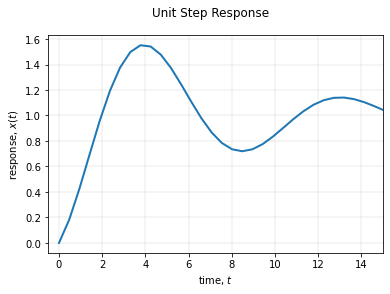

In [27]:
t1, x1 = signal.step(sys1)
fig = plt.figure()
fig.suptitle('Unit Step Response')
ax = fig.add_subplot(111)
ax.set_xlabel(r'time, $t$')
ax.set_ylabel(r'response, $x(t)$')
ax.set_xlim([-0.5,15])
ax.grid(True)
plt.plot(t1,x1);

### Define New Transfer Function for $c = 8$
In the code cell below, define a new transfer function for $c = 8$, solve for the step response and plot on a set of axes containing the result for $c=3$.

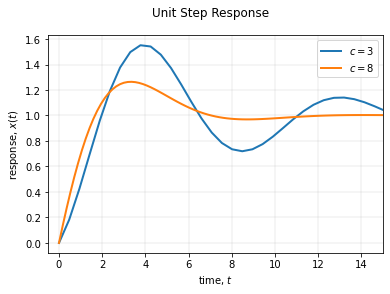

In [28]:
c = 8
num = [c, 5]
den = [10, c, 5]
sys2 = signal.TransferFunction(num, den)
t2, x2 = signal.step(sys2)
fig = plt.figure()
fig.suptitle('Unit Step Response')
ax = fig.add_subplot(111)
ax.set_xlabel(r'time, $t$')
ax.set_ylabel(r'response, $x(t)$')
ax.set_xlim([-0.5,15])
ax.grid(True)
plt.plot(t1,x1,label=r'$c = 3$')
plt.plot(t2,x2,label=r'$c = 8$')
ax.legend();

### Plot Step Response for $c = 3$ and $f(t) = 20\cdot1(t)$

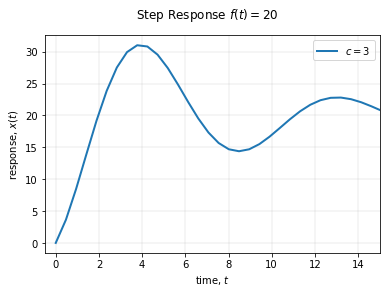

In [33]:
fig = plt.figure()
fig.suptitle(r'Step Response $f(t) = 20$')
ax = fig.add_subplot(111)
ax.set_xlabel(r'time, $t$')
ax.set_ylabel(r'response, $x(t)$')
ax.set_xlim([-0.5,15])
ax.grid(True)
plt.plot(t1,20*x1,label=r'$c = 3$')
ax.legend();

## Example 2: Impulse Response of Second-Order Model
Determine the step response of the following transfer function model.

$$ \frac{X(s)}{F(s)} = \frac{1}{2s^2+14s+20} $$

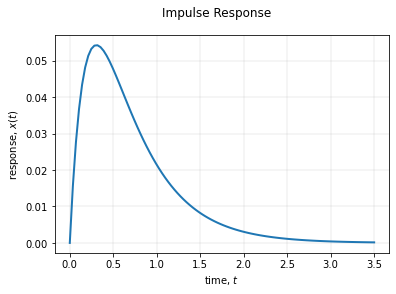

In [32]:
num = [1]
den = [2, 14, 20]
sys3 = signal.TransferFunction(num, den)
t3, x3 = signal.impulse(sys3)
fig = plt.figure()
fig.suptitle(r'Impulse Response')
ax = fig.add_subplot(111)
ax.set_xlabel(r'time, $t$')
ax.set_ylabel(r'response, $x(t)$')
ax.grid(True)
plt.plot(t3,x3);

## Example 3: Ramp Response Using the `lsim()` Function
Determine and plot the forced response of the following differential equation.

$$ \ddot{x} + 3\dot{x} + 5x = 10f(t) $$
where $f(1) = 1.5t$.

### Define the Transfer Function
Use the code cell below to define the transfer function model.

In [34]:
num = [10]
den = [1, 3, 5]
sys4 = signal.TransferFunction(num, den)

### Define the Forcing (Ramp) Function
Use the code cell below to define the forcing function.  Try specifying a time span from $0 \le t \le 2$ with 300 time points.

In [37]:
t4 = np.linspace(0,2,300)
f = 1.5*t4

### Solve and Plot the Response
Use the code cell below to solve the system and plot the response.

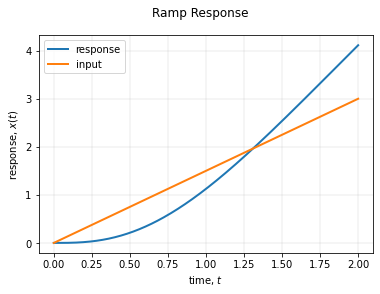

In [40]:
t4, x4, x5 = signal.lsim(sys4, f, t4)
fig = plt.figure()
fig.suptitle(r'Ramp Response')
ax = fig.add_subplot(111)
ax.set_xlabel(r'time, $t$')
ax.set_ylabel(r'response, $x(t)$')
ax.grid(True)
plt.plot(t4,x4,label='response')
plt.plot(t4,f,label='input')
ax.legend();